<a href="https://colab.research.google.com/github/lbcarv1972/ICU-Liberation/blob/main/ICU_Liberation_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Drive Assembly***

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## ***Authenticate user***

In [ ]:
from google.colab import auth
auth.authenticate_user()

# **Importing libraries**

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np # Import numpy and define the 'np' alias
import scipy
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf  # Use smf for formula API
import statsmodels.api as sm # Import the main statsmodels API
import seaborn as sns


# **Obtaining Credentials**

In [ ]:
# Get credentials and authorize using 'default' instead of 'GoogleCredentials'
import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

# **Import from Google Spreadsheet**

In [ ]:
# Import from Google Spreadsheet
spreadsheet_id = '1MIQ60QzzUd6JaOgQomSVOtl_yikHh-JPHNu0z5-pLAs'
sheet = gc.open_by_key(spreadsheet_id)

# **Worksheet Definition**



In [ ]:
# Worksheet Definition
worksheet = sheet.worksheet('Entradas')

# Get all data as a list of lists
data = worksheet.get_all_values()

# Get data as a Pandas DataFrame
df = pd.DataFrame(data[1:], columns=data[0])

# **Date Conversion to Month_Year format**

In [ ]:
# Converta a coluna 'Data' para o tipo datetime
# Use the dayfirst=True argument to correctly parse dates in the format dd/mm/yyyy
df['Data'] = pd.to_datetime(df['Data'], dayfirst=True)

# Convert Date column to Month_Year
df['Mes_Ano'] = df['Data'].dt.strftime('%m-%Y')

# Convert the Month_Year column to categorical
df['Mes_Ano'] = pd.Categorical(df['Mes_Ano'])

# **Create the chart for Head_of_bed_elevation  by Month_Year**


<ipython-input-70-6e4118ac2046>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['Mes_Ano', 'Cabeceira_elevada'])['Cabeceira_elevada'].count().unstack()


Mes_Ano,01-2024,02-2024,03-2024,04-2024,05-2024,06-2024,07-2024,08-2024,09-2024,10-2024,11-2024
Cabeceira_elevada,,,,,,,,,,,
Não,3,3,14,5,6,4,4,2,4,1,7
Sim,108,225,254,268,274,283,257,274,246,112,240


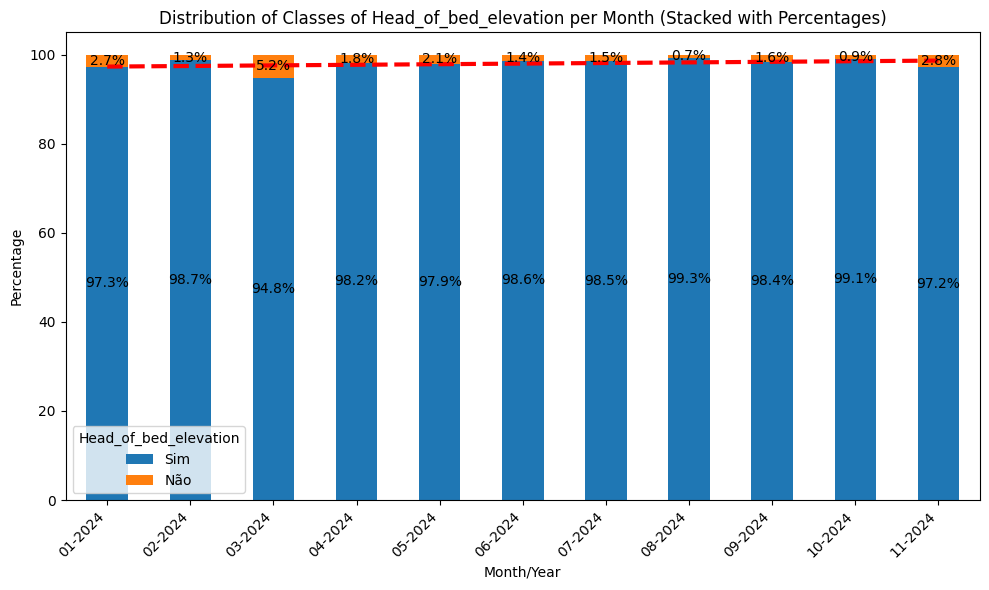

In [ ]:
# Group the data and calculate the count for each category
grouped_data = df.groupby(['Mes_Ano', 'Cabeceira_elevada'])['Cabeceira_elevada'].count().unstack()

# Reorder the columns to have "No" last (bottom)
grouped_data = grouped_data[['Sim', 'Não']]  # Order: 'Sim', then 'Não'

# Create the contingency table
contingency_table = pd.crosstab(df['Cabeceira_elevada'], df['Mes_Ano'])

# Format the table with Head_of_bed_elevation classes in the rows and months in the columns
rass_table = contingency_table.T

# Transpose the table to have months as columns and variables as rows
rass_table_transposed = rass_table.T

# Apply style to transposed table
styled_table = rass_table_transposed.style.set_properties(**{
    'border': '1px solid black',  # Set the table border
    'text-align': 'center',  # Centers text in cells
}).background_gradient(cmap='Blues').set_caption("Distribution of Classes of Head_of_bed_elevation per Month").format(precision=0) # Sets the table title and number precision

# Display the table with style
display(styled_table)

# Calculate the percentages
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Create stacked column chart with percentages
ax = percentage_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the chart
plt.title('Distribution of Classes of Head_of_bed_elevation per Month (Stacked with Percentages)')
plt.xlabel('Month/Year')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Head_of_bed_elevation')

# Add the percentage values ​​to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Add label only if height is greater than 0
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

# Add trendline (highlighted)
x = np.arange(len(percentage_data))
y = percentage_data['Sim'].values # Assuming you want the trend for 'Yes'
z = np.polyfit(x, y, 1)  # Fit a polynomial of degree 1 (straight line)
p = np.poly1d(z)
plt.plot(x, p(x), "r--", linewidth=3)  # "r--" for red dashed line, linewidth for thickness

plt.tight_layout()
plt.show()

# **Create the graph for Glycemic Protocol by Month_Year**

<ipython-input-71-20af5a57c5c6>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['Mes_Ano', 'Protocolo_glicemico'])['Protocolo_glicemico'].count().unstack()


Mes_Ano,01-2024,02-2024,03-2024,04-2024,05-2024,06-2024,07-2024,08-2024,09-2024,10-2024,11-2024
Protocolo_glicemico,,,,,,,,,,,
Não,0,6,14,12,2,24,37,11,16,0,28
Sim,111,222,254,261,278,263,224,265,234,113,219


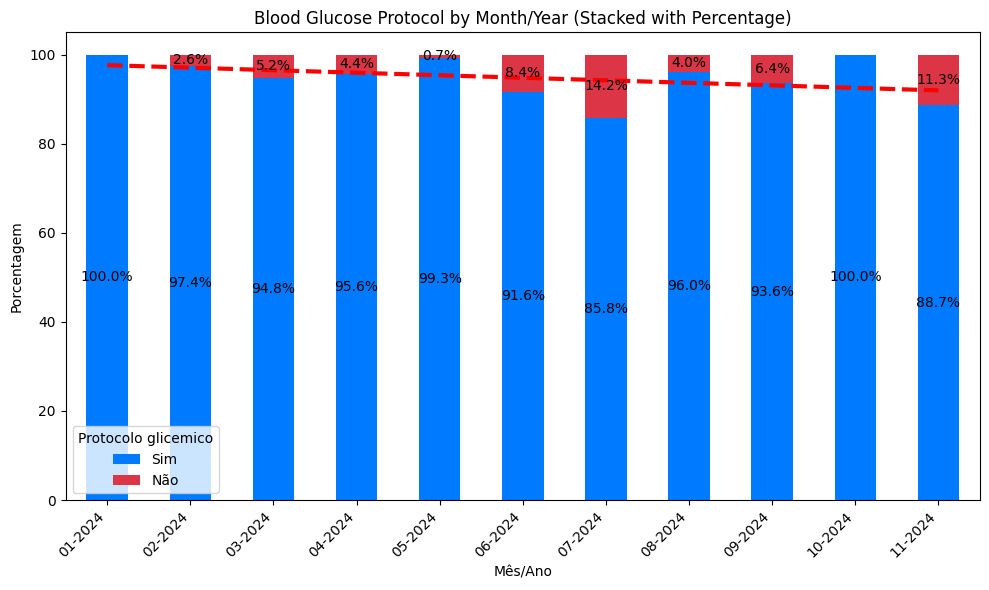

In [ ]:
# Group the data and calculate the count for each category
grouped_data = df.groupby(['Mes_Ano', 'Protocolo_glicemico'])['Protocolo_glicemico'].count().unstack()

# Reorder the columns to have "No" last (bottom)
grouped_data = grouped_data[['Sim', 'Não']]  # Order: 'Sim', then 'Não'

# Create the contingency table
contingency_table = pd.crosstab(df['Protocolo_glicemico'], df['Mes_Ano'])

# Format the table with Glycemic_protocol  classes in the rows and months in the columns
rass_table = contingency_table.T

# Transpose the table to have months as columns and variables as rows
rass_table_transposed = rass_table.T

# Apply style to transposed table
styled_table = rass_table_transposed.style.set_properties(**{
    'border': '1px solid black',  # Set the table border
    'text-align': 'center',  # Centers text in cells
}).background_gradient(cmap='Blues').set_caption("Distribution of Glycemic Protocol Classes by Month").format(precision=0) # Sets the table title and number precision

# Display the table with style
display(styled_table)

# Reorder the columns to have "No" last (bottom)
grouped_data = grouped_data[['Sim', 'Não']]  # Order: 'Sim', then 'Não'

# Calculate the percentages
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Set the desired colors for the "Yes" and "No" columns
colors = ['#007bff', '#dc3545']  # Blue for "Yes", Red for "No"

# Create stacked column chart with percentages
ax = percentage_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

# Customize the chart
plt.title('Blood Glucose Protocol by Month/Year (Stacked with Percentage)')
plt.xlabel('Mês/Ano')
plt.ylabel('Porcentagem')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Protocolo glicemico')

# Add the percentage values ​​to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Add label only if height is greater than 0
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

# Add trendline (highlighted)
x = np.arange(len(percentage_data))
y = percentage_data['Sim'].values  # Assuming you want the trend for 'Yes'
z = np.polyfit(x, y, 1)  # Fit a polynomial of degree 1 (straight line)
p = np.poly1d(z)
plt.plot(x, p(x), "r--", linewidth=3)  # "r--" for red dashed line, linewidth for thickness

plt.tight_layout()
plt.show()

# **Create the graph for VTE Prevention by Month_Year**

<ipython-input-72-f9997925caf2>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['Mes_Ano', 'Prevenção_TEV'])['Prevenção_TEV'].count().unstack()


Mes_Ano,01-2024,02-2024,03-2024,04-2024,05-2024,06-2024,07-2024,08-2024,09-2024,10-2024,11-2024
Prevenção_TEV,,,,,,,,,,,
Anticoagulação plena,0,0,0,0,0,0,0,0,0,1,0
CPI,39,91,114,92,121,65,118,90,82,51,100
Enoxaparina,69,133,139,161,151,199,127,176,153,56,135
Não,3,4,15,20,8,23,16,10,15,5,12


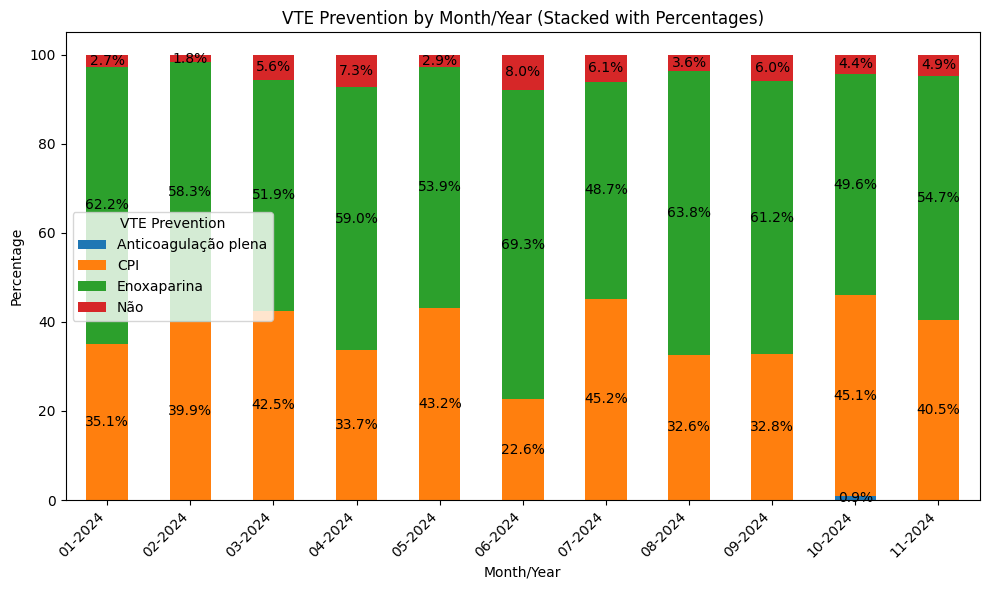

In [ ]:
# Group the data and calculate the count for each category
grouped_data = df.groupby(['Mes_Ano', 'Prevenção_TEV'])['Prevenção_TEV'].count().unstack()

# Create the contingency table
contingency_table = pd.crosstab(df['Prevenção_TEV'], df['Mes_Ano'])

# Format the table with VTE Prevention classes in the rows and months in the columns
rass_table = contingency_table.T

# Transpose the table to have months as columns and variables as rows
rass_table_transposed = rass_table.T

# Apply style to transposed table
styled_table = rass_table_transposed.style.set_properties(**{
    'border': '1px solid black',  # Set the table border
    'text-align': 'center',  # Centers text in cells
}).background_gradient(cmap='Blues').set_caption("Distribution of VTE Prevention Classes by Month").format(precision=0) # Sets the table title and number precision

#Display the table with style
display(styled_table)

# Calculate the percentages
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

#Create Stacked Column Chart with Percentages
ax = percentage_data.plot(kind='bar', stacked=True, figsize=(10, 6))

#Customize the chart
plt.title('VTE Prevention by Month/Year (Stacked with Percentages)')
plt.xlabel('Month/Year')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='VTE Prevention')

# Add the percentage values ​​to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Add label only if height is greater than 0
            ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.tight_layout()
plt.show()

# **Create the graph for Gastritis Prevention by Month_Year**

<ipython-input-73-9159942c0a12>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['Mes_Ano', 'Prevenção_gastrite'])['Prevenção_gastrite'].count().unstack()


Mes_Ano,01-2024,02-2024,03-2024,04-2024,05-2024,06-2024,07-2024,08-2024,09-2024,10-2024,11-2024
Prevenção_gastrite,,,,,,,,,,,
Dieta,0,1,7,42,57,56,63,106,101,31,74
Esomeprazol,0,0,26,31,48,50,18,40,31,20,24
Não,0,7,13,23,15,19,9,8,14,4,17
Omeprazol,111,220,222,177,160,162,171,122,104,58,132


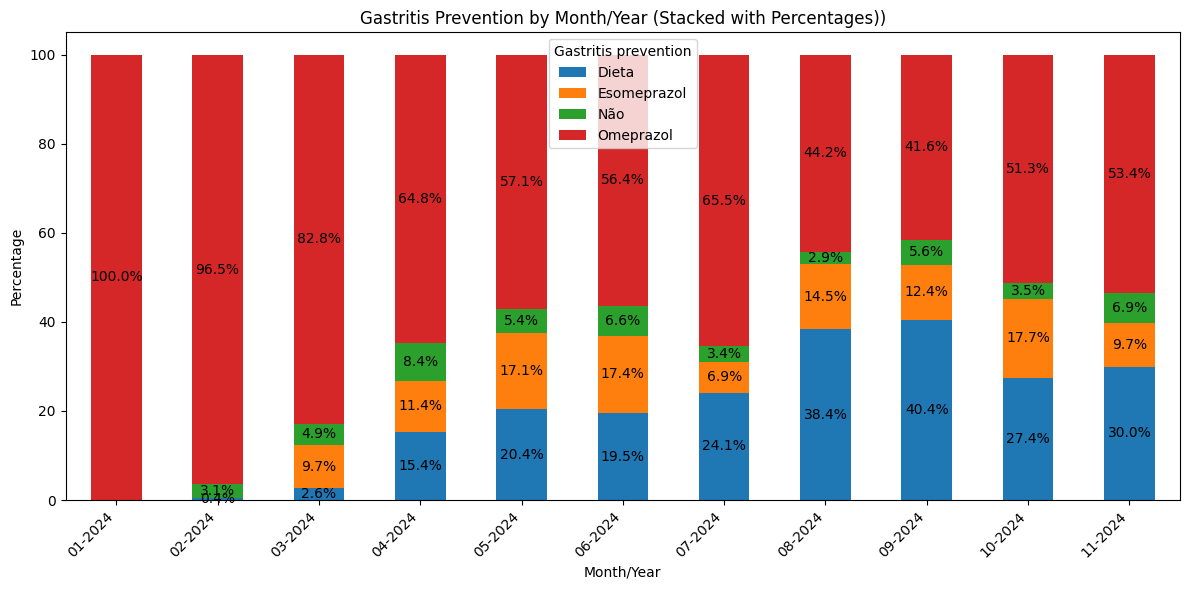

In [ ]:
# Group the data and calculate the count for each category
grouped_data = df.groupby(['Mes_Ano', 'Prevenção_gastrite'])['Prevenção_gastrite'].count().unstack()

#Create the contingency table
contingency_table = pd.crosstab(df['Prevenção_gastrite'], df['Mes_Ano'])

# Format the table with Gastritis Prevention classes in the rows and months in the columns
rass_table = contingency_table.T

# Transpose the table to have months as columns and variables as rows
rass_table_transposed = rass_table.T

# Apply style to transposed table
styled_table = rass_table_transposed.style.set_properties(**{
    'border': '1px solid black',  # Set the table border
    'text-align': 'center',  # Centers text in cells
}).background_gradient(cmap='Blues').set_caption("Distribution of Gastritis Prevention Classes by Month").format(precision=0) # Sets the table title and number precision

# Display the table with style
display(styled_table)

# Calculate the percentages
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Create stacked column chart with percentages
ax = percentage_data.plot(kind='bar', stacked=True, figsize=(12, 6))  # Increased figsize for better readability

# Customize the chart
plt.title('Gastritis Prevention by Month/Year (Stacked with Percentages))')
plt.xlabel('Month/Year')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gastritis prevention')

# Add the percentage values ​​to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Add label only if height is greater than 0
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.tight_layout()
plt.show()

# **Create the chart for Feeding by Month_Year**

<ipython-input-74-3092b1b513ab>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['Mes_Ano', 'Dieta'])['Dieta'].count().unstack()


Mes_Ano,01-2024,02-2024,03-2024,04-2024,05-2024,06-2024,07-2024,08-2024,09-2024,10-2024,11-2024
Dieta,,,,,,,,,,,
Enteral,60,135,121,116,115,75,65,114,123,27,67
Não,20,52,82,88,87,116,88,45,51,38,60
Oral,31,41,65,61,78,96,108,117,76,47,120
Parenteral,0,0,0,8,0,0,0,0,0,1,0


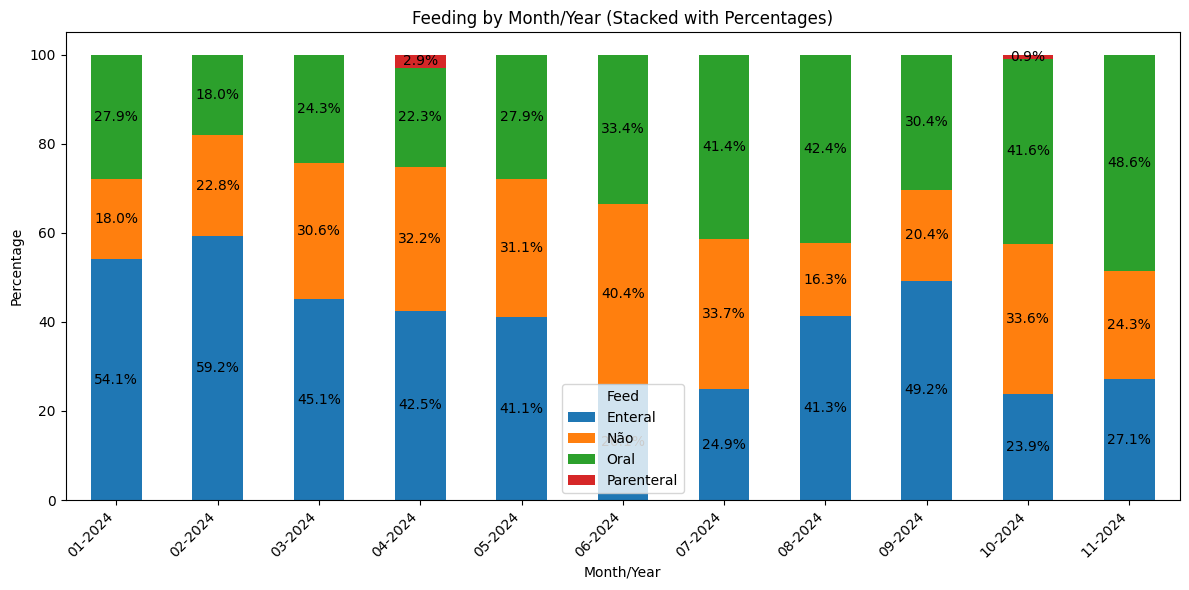

In [ ]:
# Group the data and calculate the count for each category
grouped_data = df.groupby(['Mes_Ano', 'Dieta'])['Dieta'].count().unstack()

# Create the contingency table
contingency_table = pd.crosstab(df['Dieta'], df['Mes_Ano'])

# Format the table with Feeding classes in the rows and months in the columns
rass_table = contingency_table.T

# Transpose the table to have months as columns and variables as rows
rass_table_transposed = rass_table.T

# Apply style to transposed table
styled_table = rass_table_transposed.style.set_properties(**{
    'border': '1px solid black',  # Set the table border
    'text-align': 'center',  # Centers text in cells
}).background_gradient(cmap='Blues').set_caption("Distribution of Feeding Classes by Month").format(precision=0) # Sets the table title and number precision

#Display the table with style
display(styled_table)

# Calculate the percentages
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

#Create Stacked Column Chart with Percentages
ax = percentage_data.plot(kind='bar', stacked=True, figsize=(12, 6))  # Increased figsize for better readability

#Customize the chart
plt.title('Feeding by Month/Year (Stacked with Percentages)')
plt.xlabel('Month/Year')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Feed')

# Add the percentage values ​​to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Add label only if height is greater than 0
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.tight_layout()
plt.show()

# **Create the chart for Bladder Catheterization by Month_Year**

<ipython-input-75-dee1a50d2ced>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['Mes_Ano', 'Sondagem_vesical'])['Sondagem_vesical'].count().unstack()


Mes_Ano,01-2024,02-2024,03-2024,04-2024,05-2024,06-2024,07-2024,08-2024,09-2024,10-2024,11-2024
Sondagem_vesical,,,,,,,,,,,
Não,111,225,171,202,145,163,177,183,143,83,175
SVA,0,0,9,13,22,29,4,22,39,7,30
SVD,0,3,88,58,113,95,80,71,68,23,42


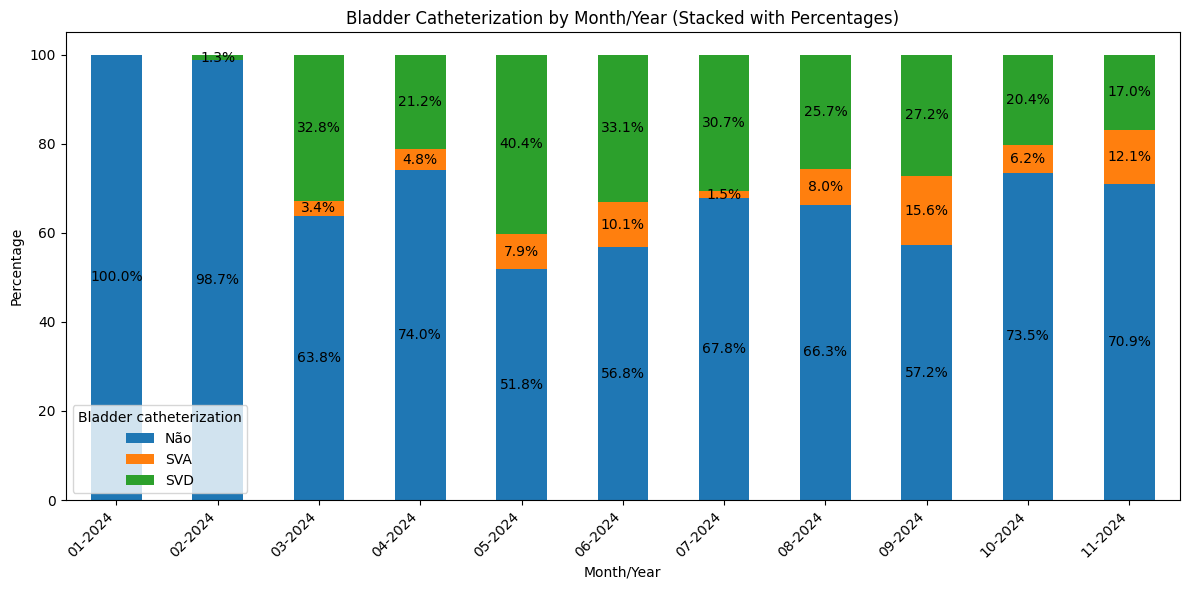

In [ ]:
# Group the data and calculate the count for each category
grouped_data = df.groupby(['Mes_Ano', 'Sondagem_vesical'])['Sondagem_vesical'].count().unstack()

# Create the contingency table
contingency_table = pd.crosstab(df['Sondagem_vesical'], df['Mes_Ano'])

# Format the table with Bladder Catheterization classes in the rows and months in the columns
rass_table = contingency_table.T

# Transpose the table to have months as columns and variables as rows
rass_table_transposed = rass_table.T

# Apply style to transposed table
styled_table = rass_table_transposed.style.set_properties(**{
    'border': '1px solid black',  # Set the table border
    'text-align': 'center',  # Centers text in cells
}).background_gradient(cmap='Blues').set_caption("Distribution of Bladder Catheterization Classes by Month").format(precision=0) # Sets the table title and number precision

#Display the table with style
display(styled_table)

# Calculate the percentages
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Create stacked column chart with percentages
ax = percentage_data.plot(kind='bar', stacked=True, figsize=(12, 6))  # Increased figsize for better readability

#Customize the chart
plt.title('Bladder Catheterization by Month/Year (Stacked with Percentages)')
plt.xlabel('Month/Year')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Bladder catheterization')

# Add the percentage values ​​to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Add label only if height is greater than 0
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.tight_layout()
plt.show()

# **Create the graph for END by Month_Year**

<ipython-input-76-010e0dc3bde7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['END_Category'] = pd.cut(


Mes_Ano,01-2024,02-2024,03-2024,04-2024,05-2024,06-2024,07-2024,08-2024,09-2024,10-2024,11-2024
END_Category,,,,,,,,,,,
0 - sem dor,81,89,92,108,145,159,159,160,130,77,169
1 a 3 - dor leve,8,3,8,4,6,0,2,1,2,2,2
4 a 7 - dor moderada,6,13,13,16,9,12,11,9,7,6,6
8 a 10 - dor forte,5,7,5,3,5,4,4,2,3,0,1


<ipython-input-76-010e0dc3bde7>:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_filtered.groupby(['Mes_Ano', 'END_Category'])['END_Category'].count().unstack()


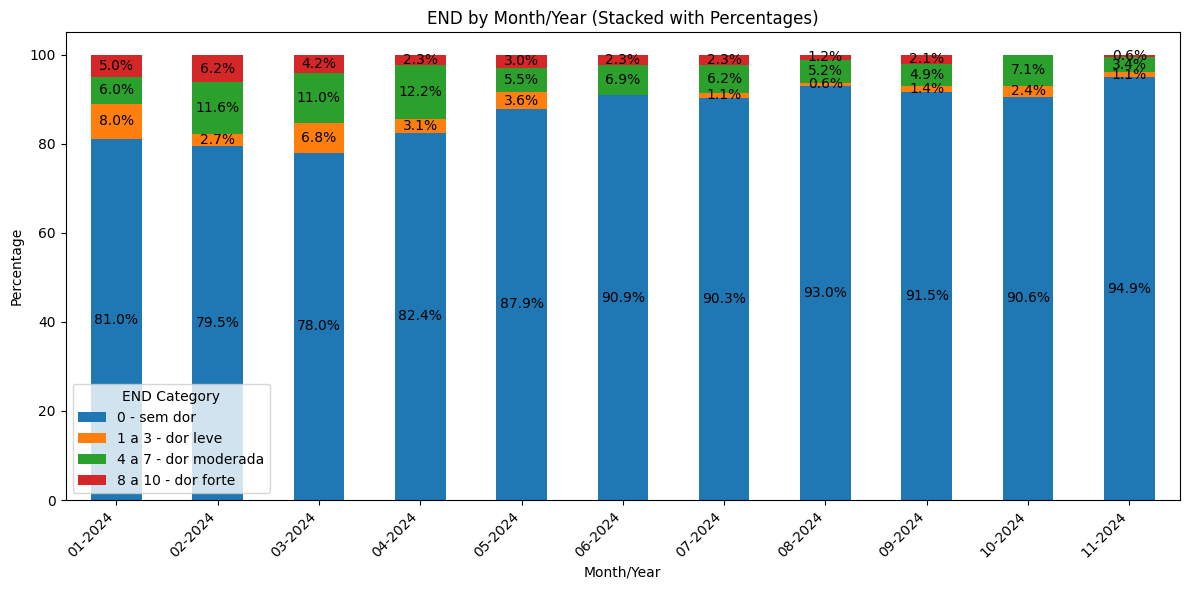

In [ ]:
#1. Create categories for END column

# Convert 'END' column to numeric, handling errors by setting them to NaN
df['END'] = pd.to_numeric(df['END'], errors='coerce')

# Filter out rows with 'NA' in the 'END' column
df_filtered = df.dropna(subset=['END'])

df_filtered['END_Category'] = pd.cut(
    df_filtered['END'],
    bins=[-1, 0, 3, 7, 10],  # Define bin edges, -1 to include 0
    labels=['0 - sem dor', '1 a 3 - dor leve', '4 a 7 - dor moderada', '8 a 10 - dor forte'],
    right=True,  # Include right edge in the bin
    include_lowest=False,  # Don't include the lowest value (-1)
    duplicates='drop'  # Handle potential duplicate edges
)

# Create the contingency table using the filtered DataFrame (df_filtered)
contingency_table = pd.crosstab(df_filtered['END_Category'], df_filtered['Mes_Ano'])

# Format the table with END classes in the rows and months in the columns
rass_table = contingency_table.T

# Transpose the table to have months as columns and variables as rows
rass_table_transposed = rass_table.T

# Apply style to transposed table
styled_table = rass_table_transposed.style.set_properties(**{
    'border': '1px solid black',  # Set the table border
    'text-align': 'center',  # Centers text in cells
}).background_gradient(cmap='Blues').set_caption("Distribution of END_Category Classes by Month").format(precision=0) # Sets the table title and number precision

#Display the table with style
display(styled_table)

# 2. Group data and calculate percentages
grouped_data = df_filtered.groupby(['Mes_Ano', 'END_Category'])['END_Category'].count().unstack()
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

#3. Create stacked column chart
ax = percentage_data.plot(kind='bar', stacked=True, figsize=(12, 6))

#4. Customize plot
plt.title('END by Month/Year (Stacked with Percentages)')
plt.xlabel('Month/Year')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='END Category')

# 5. Add percentage values to bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.tight_layout()
plt.show()

# **Create chart for BPS by Month_Year**

<ipython-input-77-740151a08410>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['BPS'] = pd.to_numeric(df_filtered['BPS'], errors='coerce')
<ipython-input-77-740151a08410>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['BPS_Category'] = pd.cut(


Mes_Ano,01-2024,02-2024,03-2024,04-2024,05-2024,06-2024,07-2024,08-2024,09-2024,10-2024,11-2024
BPS_Category,,,,,,,,,,,
3 - no pain,45,107,116,130,97,109,76,96,100,31,75
4 to 7 - mild pain,16,35,24,27,21,7,6,7,10,6,4
8 to 11 - moderate pain,0,0,1,1,0,0,0,0,2,0,0


<ipython-input-77-740151a08410>:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_filtered.groupby(['Mes_Ano', 'BPS_Category'])['BPS_Category'].count().unstack()


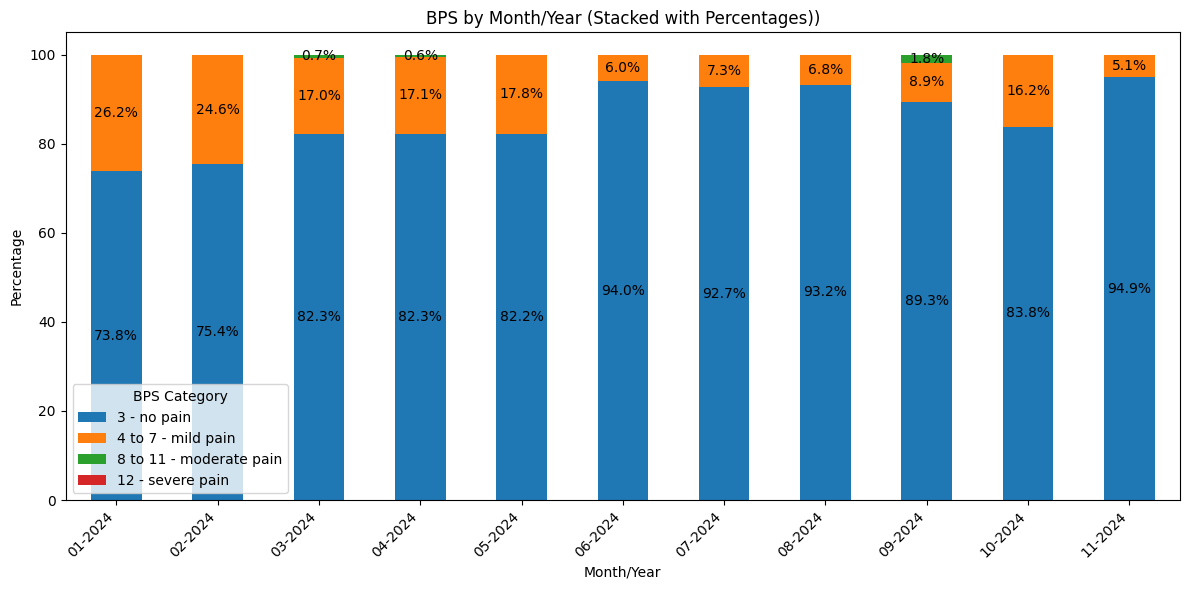

In [ ]:
# 1. Exclude 'NA' values from BPS data
df_filtered = df[df['BPS'] != 'NA']  # Filter out rows where BPS is 'NA'

# 2. Convert BPS to numeric
df_filtered['BPS'] = pd.to_numeric(df_filtered['BPS'], errors='coerce')

# 3. Create categories for BPS
df_filtered['BPS_Category'] = pd.cut(
    df_filtered['BPS'],
    bins=[2, 3, 7, 11, 12],  # Bin edges to define categories
    labels=['3 - no pain', '4 to 7 - mild pain', '8 to 11 - moderate pain', '12 - severe pain'],
    right=True,
    include_lowest=False
)


# Create the contingency table
contingency_table = pd.crosstab(df_filtered['BPS_Category'], df_filtered['Mes_Ano'])

# Format the table with RASS classes in the rows and months in the columns
rass_table = contingency_table.T

# Transpose the table to have months as columns and variables as rows
rass_table_transposed = rass_table.T

# Apply style to transposed table
styled_table = rass_table_transposed.style.set_properties(**{
    'border': '1px solid black',  # Set the table border
    'text-align': 'center',  # Centers text in cells
}).background_gradient(cmap='Blues').set_caption("Distribution of BPS_Category Classes by Month").format(precision=0) # Sets the table title and number precision

#Display the table with style
display(styled_table)

#4. Group data and calculate percentages
grouped_data = df_filtered.groupby(['Mes_Ano', 'BPS_Category'])['BPS_Category'].count().unstack()
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# 5. Create stacked column chart
ax = percentage_data.plot(kind='bar', stacked=True, figsize=(12, 6))

# 6. Customize plot
plt.title('BPS by Month/Year (Stacked with Percentages))')
plt.xlabel('Month/Year')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='BPS Category')

# 7. Add percentage values to bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.tight_layout()
plt.show()


# **Create the chart for RASS by Month_Year**

Mes_Ano,01-2024,02-2024,03-2024,04-2024,05-2024,06-2024,07-2024,08-2024,09-2024,10-2024,11-2024
RASS_Category,,,,,,,,,,,
-4 and -5 - deep sedation and coma,46,92,91,101,78,101,66,52,38,9,58
-2 and -3 - light to moderate sedation,5,20,14,26,22,13,12,21,30,15,9
0 and -1 - optimal sedation,54,108,148,128,159,165,172,197,170,82,171
+1 to +5 - agitation,6,8,15,18,21,8,11,6,12,7,9


<ipython-input-78-f32062c93b9f>:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_filtered.groupby(['Mes_Ano', 'RASS_Category'])['RASS_Category'].count().unstack()


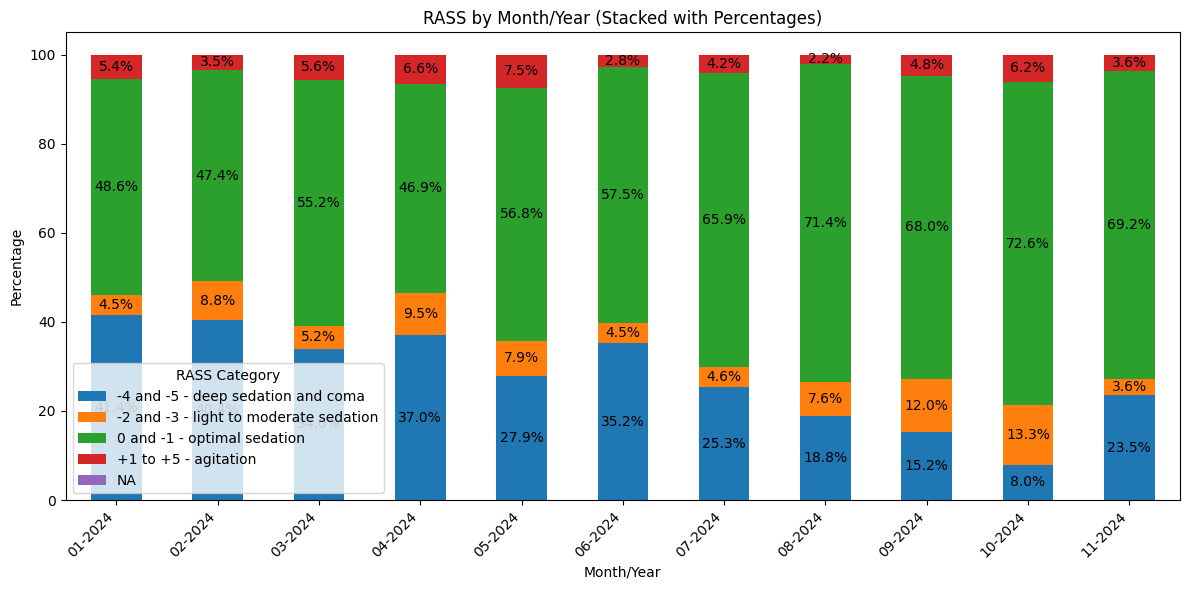

In [ ]:
# 1. Convert RASS to numeric and filter values 'NA'
df['RASS'] = pd.to_numeric(df['RASS'], errors='coerce')
df_filtered = df[df['RASS'].notna()]

# 2. Create categories for RASS, including 'NA'
df_filtered['RASS_Category'] = pd.cut(df_filtered['RASS'],
    bins=[-5, -3, -1, 1, 6],  # Bin edges
    labels=['-4 and -5 - deep sedation and coma', '-2 and -3 - light to moderate sedation', '0 and -1 - optimal sedation', '+1 to +5 - agitation'],  # Labels
    right=False,  # Include left edge, exclude right edge
    include_lowest=True,  # Include the lowest value (-6 in this case)
    duplicates='drop'  # Drop duplicate edges if any
)


# Handle 'NA' values separately (if needed)
df_filtered['RASS_Category'] = df_filtered['RASS_Category'].cat.add_categories('NA')  # Add 'NA' category
df_filtered.loc[df_filtered['RASS'].isna(), 'RASS_Category'] = 'NA'  # Assign 'NA' to missing values

# Create the contingency table
contingency_table = pd.crosstab(df_filtered['RASS_Category'], df_filtered['Mes_Ano'])

# Format the table with RASS classes in the rows and months in the columns
rass_table = contingency_table.T

# Transpose the table to have months as columns and variables as rows
rass_table_transposed = rass_table.T

# Apply style to transposed table
styled_table = rass_table_transposed.style.set_properties(**{
    'border': '1px solid black',  # Set the table border
    'text-align': 'center',  # Centers text in cells
}).background_gradient(cmap='Blues').set_caption("Distribution of RASS_Category Classes by Month").format(precision=0) # Sets the table title and number precision

# Display the table with style
display(styled_table)

# 3. Filter out 'NA' category
df_filtered = df_filtered[df_filtered['RASS_Category'] != 'NA']

# 4. Group data and calculate percentages using the filtered DataFrame
grouped_data = df_filtered.groupby(['Mes_Ano', 'RASS_Category'])['RASS_Category'].count().unstack()
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# 5. Create stacked column chart
ax = percentage_data.plot(kind='bar', stacked=True, figsize=(12, 6))

# 6. Customize plot
plt.title('RASS by Month/Year (Stacked with Percentages)')
plt.xlabel('Month/Year')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')

# 7. Set legend (no need to filter as 'NA' is already excluded)
ax.legend(title='RASS Category')

# 8. Add percentage values to bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.tight_layout()
plt.show()

# **Create chart for CAM-ICU by Month_Year**

<ipython-input-79-bcdcf560d89a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['Mes_Ano', 'CAM-ICU'])['CAM-ICU'].count().unstack()


Mes_Ano,01-2024,02-2024,03-2024,04-2024,05-2024,06-2024,07-2024,08-2024,09-2024,10-2024,11-2024
CAM-ICU,,,,,,,,,,,
NA,46,99,101,118,94,110,74,55,48,19,62
Negativo,42,69,108,82,100,99,136,116,97,42,126
Positivo,23,60,59,73,86,78,51,105,105,52,59


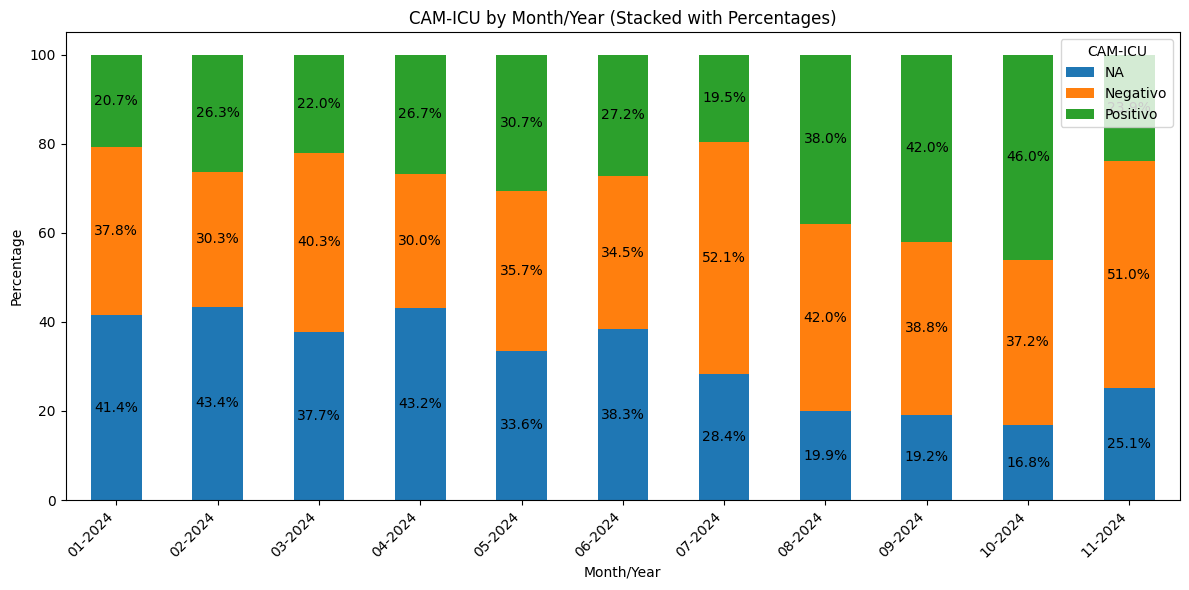

In [ ]:
# Group the data and calculate the count for each category
grouped_data = df.groupby(['Mes_Ano', 'CAM-ICU'])['CAM-ICU'].count().unstack()

# Create the contingency table
contingency_table = pd.crosstab(df['CAM-ICU'], df['Mes_Ano'])

# Format the table with CAM-ICU classes in the rows and months in the columns
rass_table = contingency_table.T

# Transpose the table to have months as columns and variables as rows
rass_table_transposed = rass_table.T

# Apply style to transposed table
styled_table = rass_table_transposed.style.set_properties(**{
    'border': '1px solid black',  # Set the table border
    'text-align': 'center',  # Centers text in cells
}).background_gradient(cmap='Blues').set_caption("Distribution of CAM-ICU Classes by Month").format(precision=0) # Sets the table title and number precision

# Display the table with style
display(styled_table)

# Calculate the percentages
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Create stacked column chart with percentages
ax = percentage_data.plot(kind='bar', stacked=True, figsize=(12, 6))

# Customize the chart
plt.title('CAM-ICU by Month/Year (Stacked with Percentages)')
plt.xlabel('Month/Year')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='CAM-ICU')

# Add the percentage values ​​to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Add label only if height is greater than 0
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.tight_layout()
plt.show()

# **Create the graph for Analgesic_sedative by Month_Year**

<ipython-input-80-e5d668afaa92>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['Mes_Ano', 'Analgésico_sedativo'])['Analgésico_sedativo'].count().unstack()


Mes_Ano,01-2024,02-2024,03-2024,04-2024,05-2024,06-2024,07-2024,08-2024,09-2024,10-2024,11-2024
Analgésico_sedativo,,,,,,,,,,,
Apenas analgesia,5,35,0,5,21,11,4,0,4,5,0
Contínuo,31,65,103,106,112,98,64,66,100,17,50
Intermitente,0,5,16,29,18,17,25,38,48,31,60
Se necessário (SN),75,123,149,133,129,161,168,172,98,60,137


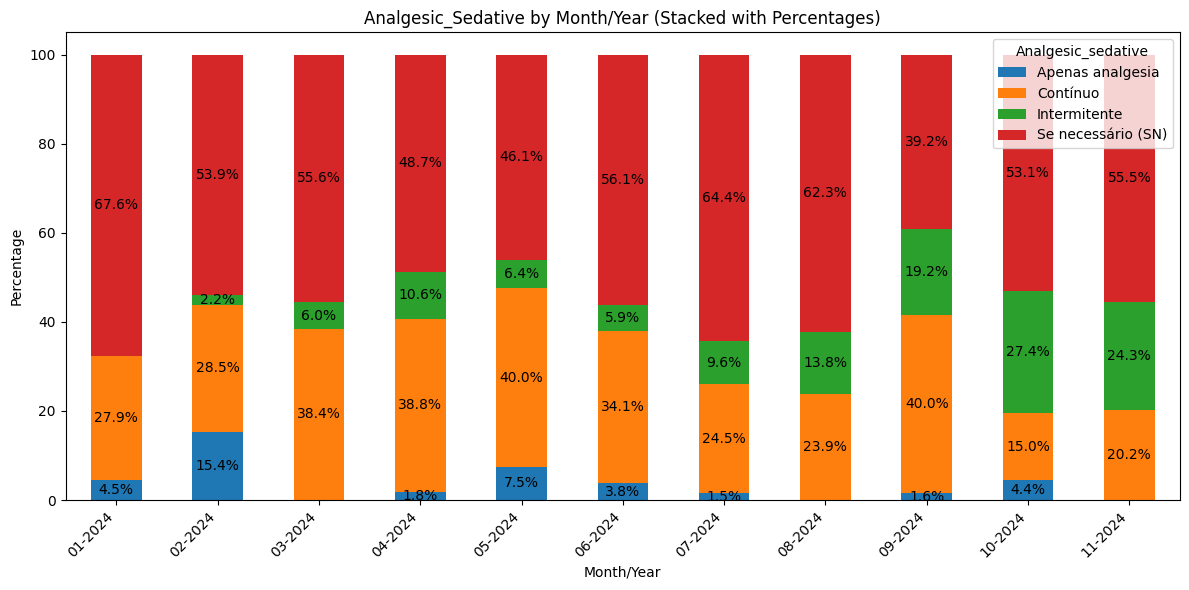

In [ ]:
# Group the data and calculate the count for each category
grouped_data = df.groupby(['Mes_Ano', 'Analgésico_sedativo'])['Analgésico_sedativo'].count().unstack()

# Create the contingency table
contingency_table = pd.crosstab(df['Analgésico_sedativo'], df['Mes_Ano'])

# Format the table with Analgesic_sedative classes in the rows and months in the columns
rass_table = contingency_table.T

# Transpose the table to have months as columns and variables as rows
rass_table_transposed = rass_table.T

# Apply style to transposed table
styled_table = rass_table_transposed.style.set_properties(**{
    'border': '1px solid black',  # Set the table border
    'text-align': 'center',  # Centers text in cells
}).background_gradient(cmap='Blues').set_caption("Distribution of Analgesic_Sedative Classes by Month").format(precision=0) # Sets the table title and number precision

#Display the table with style
display(styled_table)

# Calculate the percentages
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Create Stacked Column Chart with Percentages
ax = percentage_data.plot(kind='bar', stacked=True, figsize=(12, 6))  # Increased figsize for better readability

# Customize the chart
plt.title('Analgesic_Sedative by Month/Year (Stacked with Percentages)')
plt.xlabel('Month/Year')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Analgesic_sedative')

# Add the percentage values ​​to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Add label only if height is greater than 0
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.tight_layout()
plt.show()

# **Create chart for TDE by Month Year**

<ipython-input-81-9286ea0a1e50>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['Mes_Ano', 'TDE'])['TDE'].count().unstack()


Mes_Ano,01-2024,02-2024,03-2024,04-2024,05-2024,06-2024,07-2024,08-2024,09-2024,10-2024,11-2024
TDE,,,,,,,,,,,
NA,0,0,0,0,0,5,145,197,149,89,191
Não- Outro Motivo,85,167,234,145,210,191,35,2,0,0,2
Não- Falha de segurança,0,0,13,42,10,37,25,35,27,9,22
Sim,26,61,21,86,60,54,56,42,74,15,32


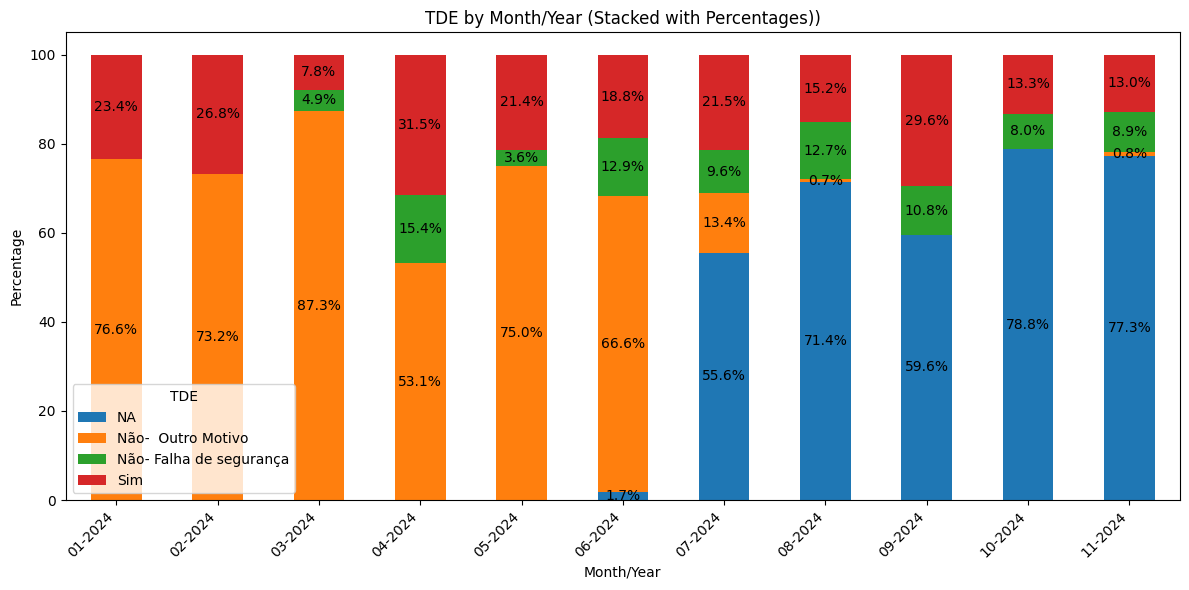

In [ ]:
# Group the data and calculate the count for each category
grouped_data = df.groupby(['Mes_Ano', 'TDE'])['TDE'].count().unstack()

# Create the contingency table
contingency_table = pd.crosstab(df['TDE'], df['Mes_Ano'])

# Format the table with TDE classes in the rows and months in the columns
rass_table = contingency_table.T

# Transpose the table to have months as columns and variables as rows
rass_table_transposed = rass_table.T

# Apply style to transposed table
styled_table = rass_table_transposed.style.set_properties(**{
    'border': '1px solid black',  # Set the table border
    'text-align': 'center',  # Centers text in cells
}).background_gradient(cmap='Blues').set_caption("Distribution of TDE Classes by Month").format(precision=0) # Sets the table title and number precision

# Display the table with style
display(styled_table)

# Calculate the percentages
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Create stacked column chart with percentages
ax = percentage_data.plot(kind='bar', stacked=True, figsize=(12, 6))  # Increased figsize for better readability

# Customize the chart
plt.title('TDE by Month/Year (Stacked with Percentages))')
plt.xlabel('Month/Year')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='TDE')

# Add the percentage values ​​to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Add label only if height is greater than 0
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.tight_layout()
plt.show()

# **Create the graph for TRE by Month_Year**

<ipython-input-82-5b15cfc3ee0c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['Mes_Ano', 'TRE'])['TRE'].count().unstack()


Mes_Ano,01-2024,02-2024,03-2024,04-2024,05-2024,06-2024,07-2024,08-2024,09-2024,10-2024,11-2024
TRE,,,,,,,,,,,
NA,0,0,0,0,0,5,143,201,142,93,189
Não- Outro Motivo,111,228,208,164,223,194,41,2,0,0,1
Não- Falha de segurança,0,0,46,46,17,65,45,39,50,10,25
Sim,0,0,14,63,40,23,32,34,58,10,32


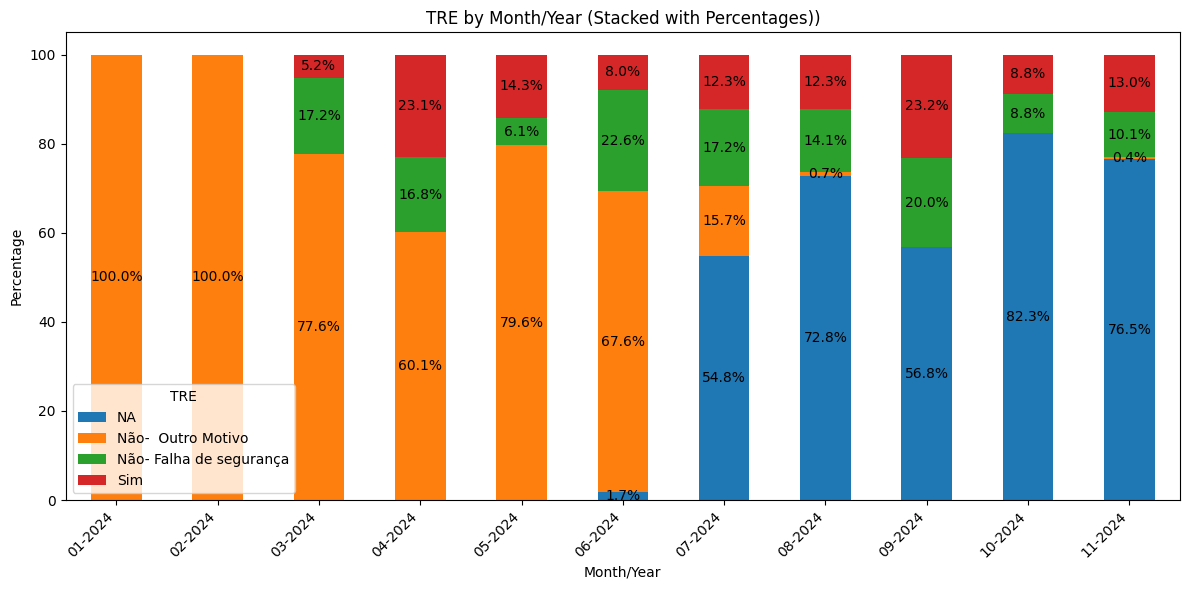

In [ ]:
# Group the data and calculate the count for each category
grouped_data = df.groupby(['Mes_Ano', 'TRE'])['TRE'].count().unstack()

# Create the contingency table
contingency_table = pd.crosstab(df['TRE'], df['Mes_Ano'])

# Format the table with TRE classes in the rows and months in the columns
rass_table = contingency_table.T

# Transpose the table to have months as columns and variables as rows
rass_table_transposed = rass_table.T

# Apply style to transposed table
styled_table = rass_table_transposed.style.set_properties(**{
    'border': '1px solid black',  # Set the table border
    'text-align': 'center',  # Centers text in cells
}).background_gradient(cmap='Blues').set_caption("Distribution of TRE Classes by Month").format(precision=0) # Sets the table title and number precision

# Display the table with style
display(styled_table)

# Calculate the percentages
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Create stacked column chart with percentages
ax = percentage_data.plot(kind='bar', stacked=True, figsize=(12, 6))  # Increased figsize for better readability

# Customize the chart
plt.title('TRE by Month/Year (Stacked with Percentages))')
plt.xlabel('Month/Year')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='TRE')

# Add the percentage values ​​to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Add label only if height is greater than 0
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.tight_layout()
plt.show()

# **Create the graph for Mobilization by Month_Year**

<ipython-input-83-f6a0026c6504>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['Mes_Ano', 'Mobilização'])['Mobilização'].count().unstack()


Mes_Ano,01-2024,02-2024,03-2024,04-2024,05-2024,06-2024,07-2024,08-2024,09-2024,10-2024,11-2024
Mobilização,,,,,,,,,,,
1,53,136,130,150,116,135,76,79,58,29,58
2,17,17,34,35,36,41,39,34,81,27,65
3,7,29,31,36,52,30,29,69,44,5,17
4,16,8,23,29,21,31,32,27,19,19,43
5,18,38,50,23,55,50,85,67,48,33,64


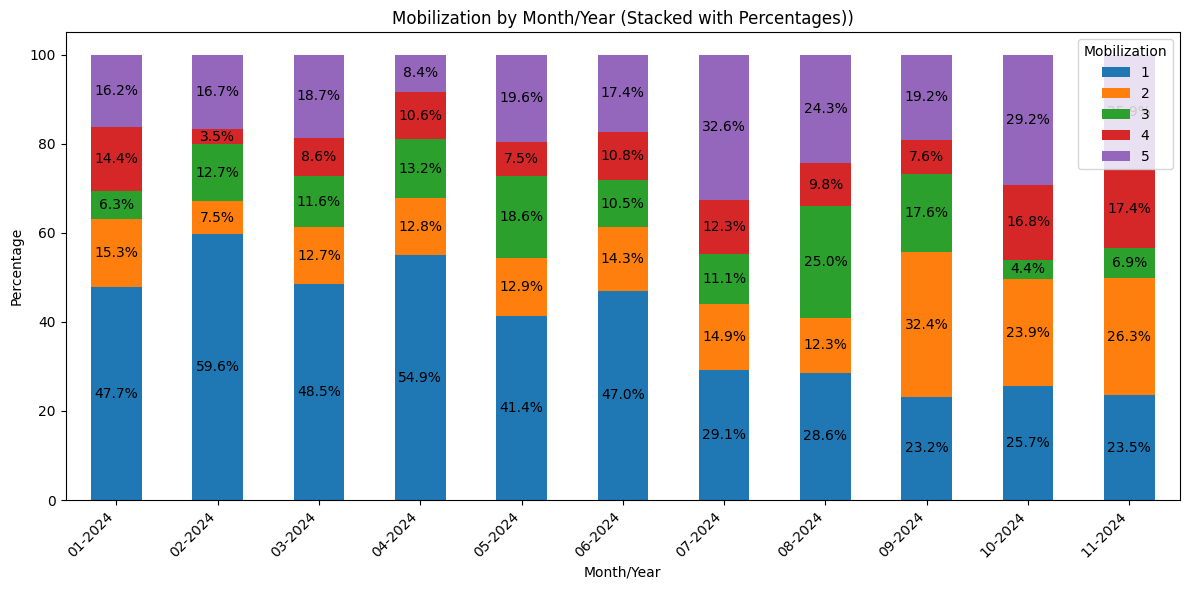

In [ ]:
# Group the data and calculate the count for each category
grouped_data = df.groupby(['Mes_Ano', 'Mobilização'])['Mobilização'].count().unstack()

# Create the contingency table
contingency_table = pd.crosstab(df['Mobilização'], df['Mes_Ano'])

# Format the table with Mobilization classes in the rows and months in the columns
rass_table = contingency_table.T

# Transpose the table to have months as columns and variables as rows
rass_table_transposed = rass_table.T

# Apply style to transposed table
styled_table = rass_table_transposed.style.set_properties(**{
    'border': '1px solid black',  # Set the table border
    'text-align': 'center',  # Centers text in cells
}).background_gradient(cmap='Blues').set_caption("Distribution of Mobilization Classes by Month").format(precision=0) # Sets the table title and number precision

# Display the table with style
display(styled_table)

# Calculate the percentages
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Create stacked column chart with percentages
ax = percentage_data.plot(kind='bar', stacked=True, figsize=(12, 6))  # Increased figsize for better readability

# Customize the chart
plt.title('Mobilization by Month/Year (Stacked with Percentages))')
plt.xlabel('Month/Year')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Mobilization')

# Add the percentage values ​​to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Add label only if height is greater than 0
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.tight_layout()
plt.show()

# ***Analysis of Variance***

In [ ]:
# Create a new binary variable 'Head_elevation__Target'
df['Cabeceira_elevada_Target'] = df['Cabeceira_elevada'].apply(lambda x: 1 if x == 'Sim' else 0)


In [ ]:
# Create a new binary variable 'Glycemic_Target Protocol'
df['Protocolo_glicemico_Target'] = df['Protocolo_glicemico'].apply(lambda x: 1 if x == 'Sim' else 0)

In [ ]:
# Assume all answers except 'No' as a goal for Gastritis Prevention
# Create a new binary variable 'Gastritis_prevention_Target'
df['Prevencao_gastrite_Target'] = df['Prevenção_gastrite'].apply(lambda x: 1 if x != 'Não' else 0)

In [ ]:
# Assume all answers except 'No' as a goal for VTE Prevention
# Create a new binary variable 'VTE_prevention_Target'
df['Prevencao_TEV_Target'] = df['Prevenção_TEV'].apply(lambda x: 1 if x != 'Não' else 0)


In [ ]:
# Assume all the answers except 'No' as your Feeding goal
# Create a new binary variable 'Feeding_Target'
df['Dieta_Target'] = df['Dieta'].apply(lambda x: 1 if x != 'Não' else 0)

In [ ]:
# Assume the answer 'No' as a goal for Bladder_cath
# Create a new binary variable 'Bladder_cath_Target'
df['Sondagem_vesical_Target'] = df['Sondagem_vesical'].apply(lambda x: 1 if x == 'Não' else 0)

In [ ]:
# Assume the target for END is the answer 0 to 3

# Convert the "END" column to numeric, treating errors as NaN
df['END'] = pd.to_numeric(df['END'], errors='coerce')

# Create a new binary variable 'END_Target'
df['END_Target'] = df['END'].apply(lambda x: 1 if 0 <= x <= 3 else 0)

In [ ]:
# Assume answer 3 as the goal for BPS
# Create a new binary variable 'BPS_Target'
df['BPS_Target'] = df['BPS'].apply(lambda x: 1 if x == 3 else 0)


In [ ]:
# Assume the target response for RASS is 0 and -1
# Create a new binary variable 'RASS_Target'
df['RASS_Target'] = df['RASS'].apply(lambda x: 1 if x in [0, -1] else 0)


In [ ]:
# Assume the Negative response as a goal for CAM-ICU
# Create a new binary variable 'CAM_ICU_Target'
df['CAM_ICU_Target'] = df['CAM-ICU'].apply(lambda x: 1 if x == 'Negativo' else 0)

In [ ]:
# Assume as target for Analgesic/Sedative all responses except Continuous
# Create a new binary variable 'Analgesic_Sedative_Target'
df['Analgesico_Sedativo_Target'] = df['Analgésico_sedativo'].apply(lambda x: 1 if x != 'Contínuo' else 0)

In [ ]:
# Assume the TDE target is Yes
# Create a new binary variable 'TDE_Target'
df['TDE_Target'] = df['TDE'].apply(lambda x: 1 if x == 'Sim' else 0)

In [ ]:
# Assume the target answer for TRE is Yes
# Create a new binary variable 'TRE_Target'
df['TRE_Target'] = df['TRE'].apply(lambda x: 1 if x == 'Sim' else 0)

In [ ]:
# Assume as a target for Mobilization all the answers except 1
# Create a new binary variable 'Mobilization_Target'
df['Mobilizacao_Target'] = df['Mobilização'].apply(lambda x: 1 if x != '1' else 0)

In [ ]:
# Analyze all binary variables of Inputs in relation to Month_Year

# Since your target variables are binary (indicating whether a certain goal was met or not) and 'Mes_Ano' is categorical, we'll use a method called Chi-squared test for independence.
# It's appropriate for testing the relationship between two categorical variables, especially when dealing with binary outcomes.

# Convert Date column to Month_Year
df['Mes_Ano'] = df['Data'].dt.strftime('%m-%Y')

# Convert the Month_Year column to categorical
df['Mes_Ano'] = pd.Categorical(df['Mes_Ano'])

# Perform Chi-square analysis

# Corrected the column name to match the DataFrame:
binary_vars = ['Cabeceira_elevada_Target', 'Protocolo_glicemico_Target', 'Prevencao_gastrite_Target', 'Prevencao_TEV_Target', 'Dieta_Target', 'Sondagem_vesical_Target', 'END_Target', 'BPS_Target', 'RASS_Target', 'CAM_ICU_Target', 'Analgesico_Sedativo_Target', 'TDE_Target', 'TRE_Target', 'Mobilizacao_Target']

results = []
for var in binary_vars:
  contingency_table = pd.crosstab(df['Mes_Ano'], df[var])
  chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)
  significance = "Sim" if p_val < 0.05 else "Não"  # Determine significance
  results.append([var, chi2_stat, f'{p_val:.3f}', dof, significance])

results_df = pd.DataFrame(results, columns=['Variable', 'Chi-squared Statistic', 'P-value', 'Degrees of Freedom', 'Significance'])

# Apply styling
def highlight_significance(s):
    is_significant = s == "Sim"
    return ['background-color: salmon' if v else '' for v in is_significant]

styled_results_df = results_df.style.apply(highlight_significance, subset=['Significance'])

# Display the styled table
display(styled_results_df)

,Variable,Chi-squared Statistic,P-value,Degrees of Freedom,Significance
0,Cabeceira_elevada_Target,19.582774,0.033,10,Sim
1,Protocolo_glicemico_Target,85.272445,0.000,10,Sim
2,Prevencao_gastrite_Target,22.585468,0.012,10,Sim
3,Prevencao_TEV_Target,20.010773,0.029,10,Sim
4,Dieta_Target,68.665111,0.000,10,Sim
5,Sondagem_vesical_Target,225.892524,0.000,10,Sim
6,END_Target,139.569937,0.000,10,Sim
7,BPS_Target,0.000000,1.000,0,Não
8,RASS_Target,86.649629,0.000,10,Sim
9,CAM_ICU_Target,55.414036,0.000,10,Sim


In [ ]:
#Perform the ANOVA analysis of the numerical variables of Entries in relation to Month_Year

df['Mes_Ano'] = pd.Categorical(df['Mes_Ano'])

numeric_vars = ['END', 'BPS', 'RASS']  # Replace with your numeric variables

results = []
for var in numeric_vars:
    # 1. Exclude 'NA' values from the current variable
    df_filtered = df[df[var] != 'NA']

    # 2. Convert the variable to numeric, handling errors
    df_filtered[var] = pd.to_numeric(df_filtered[var], errors='coerce')

    # 3. Filter out rows with missing values after conversion
    df_filtered = df_filtered[df_filtered[var].notna()]

    # 4. Perform ANOVA on the filtered data
    model = smf.ols(formula=f'{var} ~ Mes_Ano', data=df_filtered).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)

    # Get fvalue and pvalue from anova_table
    fvalue = anova_table.loc['Mes_Ano', 'F'] # Accessing 'F' value from 'Mes_Ano' row
    pvalue = anova_table.loc['Mes_Ano', 'PR(>F)'] # Accessing 'PR(>F)' value from 'Mes_Ano' row
    significance = "Sim" if pvalue < 0.05 else "Não"  # Determine significance


    results.append([var, fvalue, f'{pvalue:.3f}', significance])

results_df = pd.DataFrame(results, columns=['Variável', 'F-value', 'P-value', 'Significância'])

# Apply style to highlight significance
def highlight_significance(s):
    is_significant = s == "Sim"
    return ['background-color: salmon' if v else '' for v in is_significant]

styled_results_df = results_df.style.apply(highlight_significance, subset=['Significância'])

# Exibir a tabela com estilo
display(styled_results_df)

<ipython-input-99-f829e4a0ea23>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[var] = pd.to_numeric(df_filtered[var], errors='coerce')


,Variável,F-value,P-value,Significância
0,END,3.281644,0.000,Sim
1,BPS,3.772982,0.000,Sim
2,RASS,9.412895,0.000,Sim
